In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from itables import show
import os
import glob
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()
files = sorted(glob.glob("classified/climate_tweets_*.csv"))
print(files)
pd.set_option('display.max_colwidth', -1)

<IPython.core.display.Javascript object>

['classified/climate_tweets_2006.csv', 'classified/climate_tweets_2007.csv', 'classified/climate_tweets_2008.csv', 'classified/climate_tweets_2009.csv', 'classified/climate_tweets_2010.csv', 'classified/climate_tweets_2011.csv', 'classified/climate_tweets_2012.csv', 'classified/climate_tweets_2013.csv', 'classified/climate_tweets_2014.csv', 'classified/climate_tweets_2015.csv', 'classified/climate_tweets_2016.csv', 'classified/climate_tweets_2017.csv', 'classified/climate_tweets_2018.csv', 'classified/climate_tweets_2019.csv']


In [2]:
%%time
df = pd.concat(pd.read_csv(f, sep=";", engine="c", lineterminator="\n") for f in tqdm(files))


CPU times: user 5min 59s, sys: 56.5 s, total: 6min 56s
Wall time: 7min 24s


In [3]:
print(len(df))

28526845


In [4]:
%%time
df.timestamp = pd.to_datetime(df.timestamp)
df.index = df.timestamp

CPU times: user 6.78 s, sys: 372 ms, total: 7.15 s
Wall time: 7.11 s


In [5]:
daycounts = df.timestamp.resample("D").count()
daycounts[daycounts == 0].index

DatetimeIndex(['2006-06-07', '2006-06-08', '2006-06-09', '2006-06-10',
               '2006-06-11', '2006-06-12', '2006-06-13', '2006-06-14',
               '2006-06-15', '2006-06-16',
               ...
               '2010-02-08', '2010-02-09', '2010-03-15', '2010-03-16',
               '2010-03-17', '2010-03-18', '2010-03-19', '2010-03-20',
               '2010-03-21', '2019-08-29'],
              dtype='datetime64[ns]', name='timestamp', length=228, freq=None)

In [6]:
df.columns

Index(['username', 'fullname', 'user_id', 'tweet_id', 'tweet_url', 'timestamp',
       'timestamp_epochs', 'replies', 'retweets', 'likes', 'is_retweet',
       'retweeter_username', 'retweeter_userid', 'retweet_id', 'text', 'html',
       'text_with_emoji', 'neg', 'neu', 'compound', 'pos'],
      dtype='object')

In [15]:
df.timestamp.resample("M").count().median()

153476.5

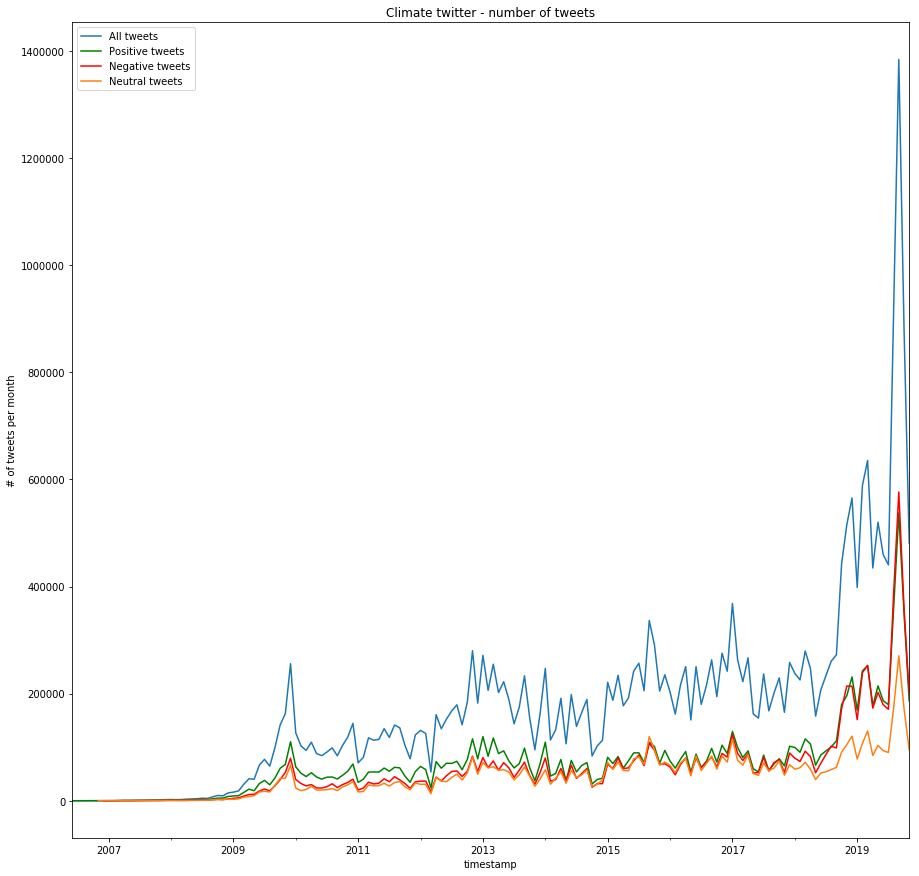

In [8]:
df.timestamp.resample("M").count().plot(figsize=(15,15), title="Climate twitter - number of tweets")
df.timestamp[df["compound"] > 0.05].resample("M").count().plot(color='g')
df.timestamp[df["compound"] < -0.05].resample("M").count().plot(color='r')
df.timestamp[df["compound"].between(-.05, .05)].resample("M").count().plot()
plt.legend(["All tweets", "Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()

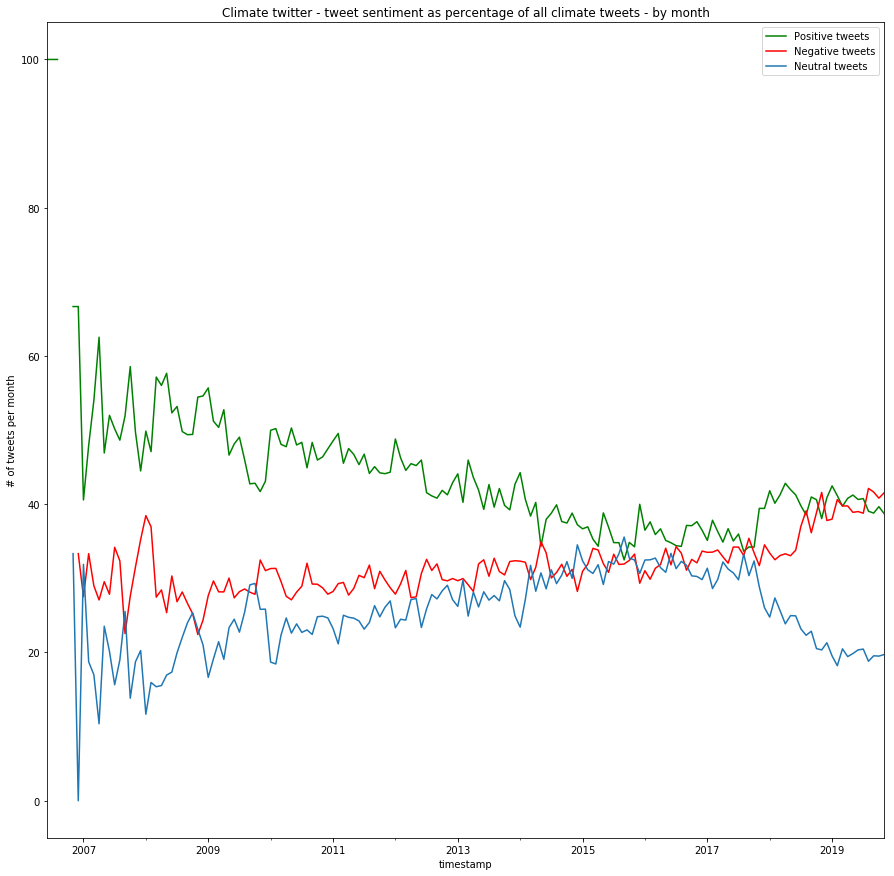

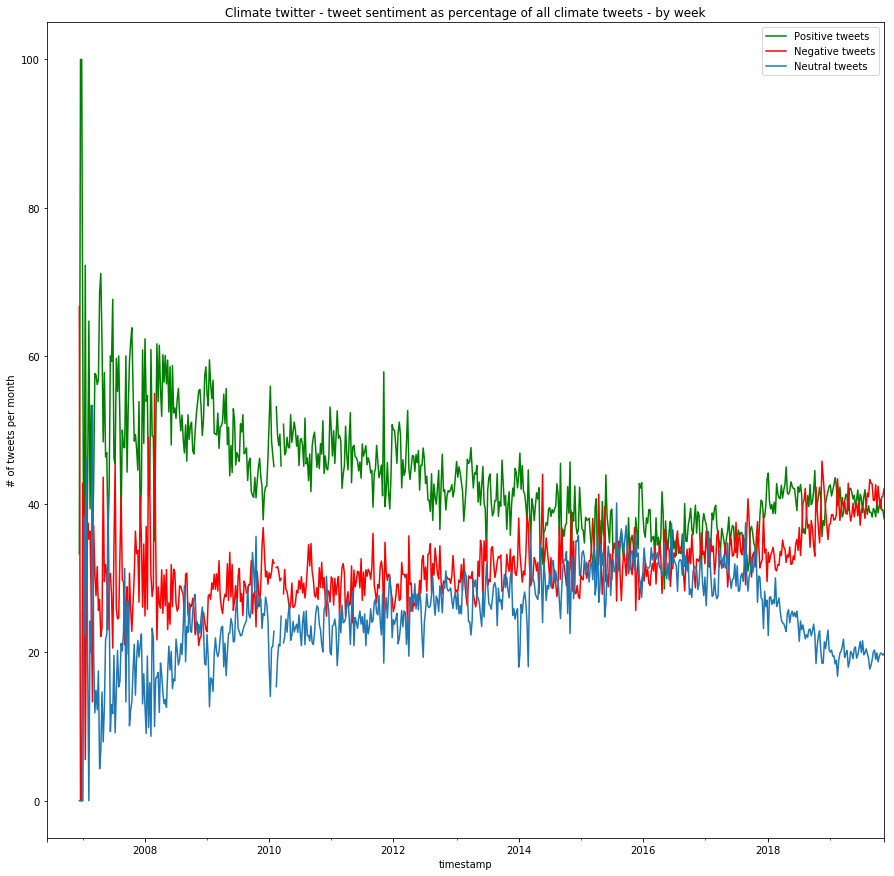

In [9]:
#et_by_month_pc = et_by_month.count() / by_month.count() * 100

all_tweets_monthly = df.timestamp.resample("M").count()
pos_tweets = df.timestamp[df["compound"] > 0.05].resample("M").count()
pos_tweets_pc = pos_tweets / all_tweets_monthly * 100
neg_tweets = df.timestamp[df["compound"] < -0.05].resample("M").count()
neg_tweets_pc = neg_tweets / all_tweets_monthly * 100
neutral_tweets = df.timestamp[df["compound"].between(-.05, .05)].resample("M").count()
neutral_tweets_pc = neutral_tweets / all_tweets_monthly * 100

pos_tweets_pc.plot(figsize=(15,15), title="Climate twitter - tweet sentiment as percentage of all climate tweets - by month",color="g")
neg_tweets_pc.plot(color='r')
neutral_tweets_pc.plot()
plt.legend(["Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()


#et_by_month_pc = et_by_month.count() / by_month.count() * 100
all_tweets_monthly = df.timestamp.resample("W").count()
pos_tweets = df.timestamp[df["compound"] > 0.05].resample("W").count()
pos_tweets_pc = pos_tweets / all_tweets_monthly * 100
neg_tweets = df.timestamp[df["compound"] < -0.05].resample("W").count()
neg_tweets_pc = neg_tweets / all_tweets_monthly * 100
neutral_tweets = df.timestamp[df["compound"].between(-.05, .05)].resample("W").count()
neutral_tweets_pc = neutral_tweets / all_tweets_monthly * 100

pos_tweets_pc.plot(figsize=(15,15), title="Climate twitter - tweet sentiment as percentage of all climate tweets - by week",color="g")
neg_tweets_pc.plot(color='r')
neutral_tweets_pc.plot()
plt.legend(["Positive tweets", "Negative tweets", "Neutral tweets"])
plt.ylabel("# of tweets per month")
plt.show()

In [34]:
%%time
def display_filtered_df(df, pattern, n=5000):
    filtered_df = df.sample(5000)
    filtered_df["text_with_emoji_formatted"] = filtered_df.text_with_emoji.str.replace(pattern, lambda x: "<b>" + x.group() + "</b>", case=False)
    show(filtered_df[["text_with_emoji_formatted", "compound"]],
        order=[[2, 'desc']],
        orderClasses=False,
        createdRow="""function( row, data, dataIndex ) {
          if (data[2] > 0) {
            $(row).css('background-color', 'rgba(0,255,0,.2)');
          } else if (data[2] == 0) {
            $(row).css('background-color', 'rgba(0,0,255,.2)');
          } else {
            $(row).css('background-color', 'rgba(255,0,0,.2)');
          }
        }""", scrollY="800px", scrollCollapse=True, paging=False, columnDefs=[{"width": "120px", "targets": "_all"}])

pattern = r"global.?warming|climate.?chang|sea.?level.?ris|rising.?sea.?level|climate.?crisis|climate.?action|extreme.?weather|biodiversity|IPCC|Paris.?accord"
display_filtered_df(df, pattern)

,text_with_emoji_formatted,compound
timestamp,,


CPU times: user 1.59 s, sys: 152 ms, total: 1.74 s
Wall time: 1.74 s


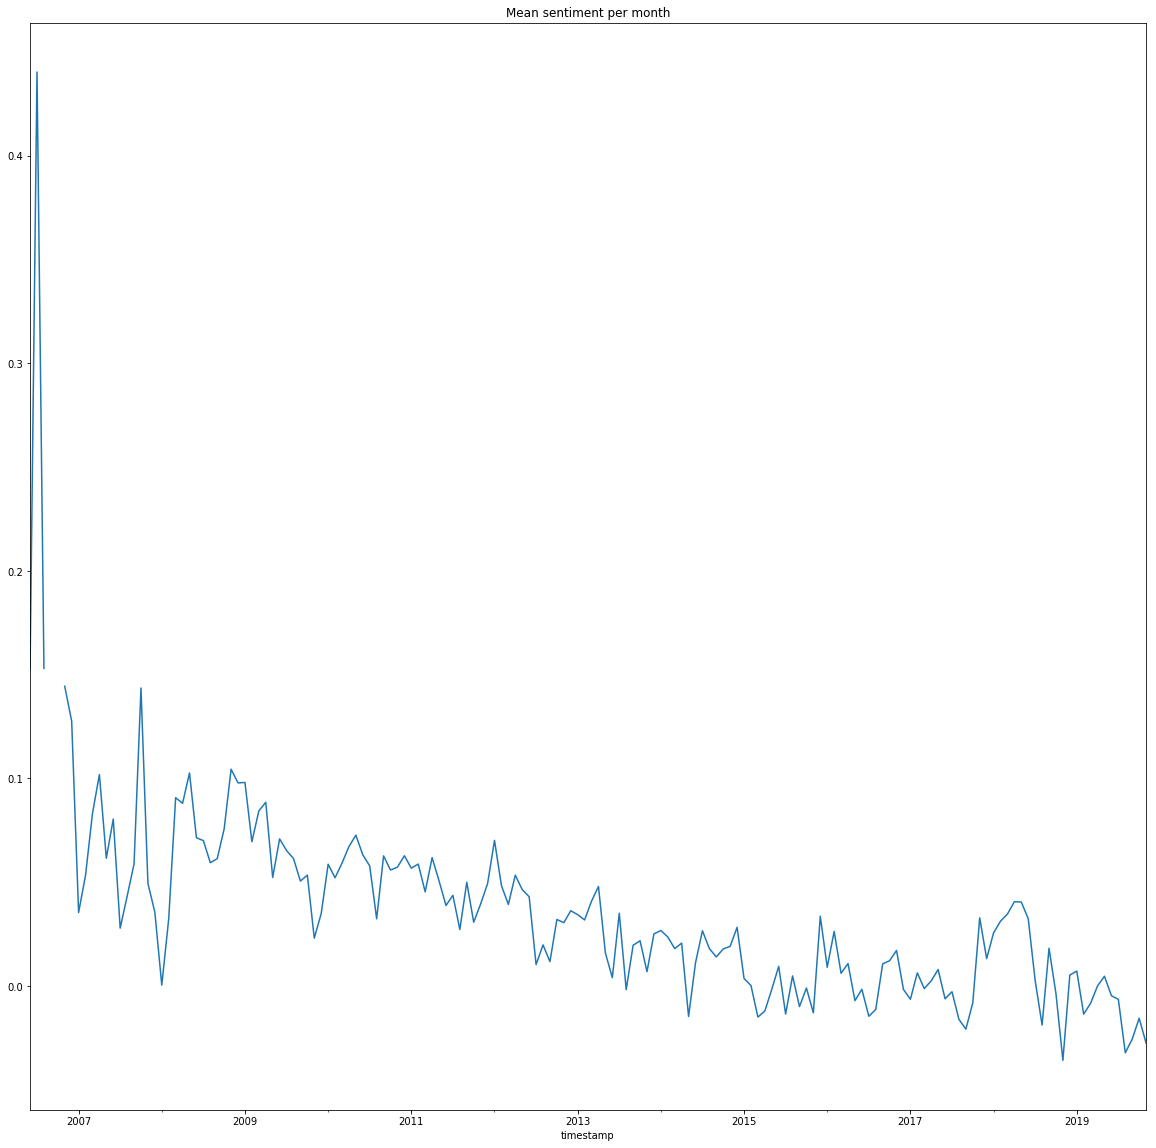

In [12]:
df["compound"].resample("M").mean().plot(figsize=(20,20), title="Mean sentiment per month")

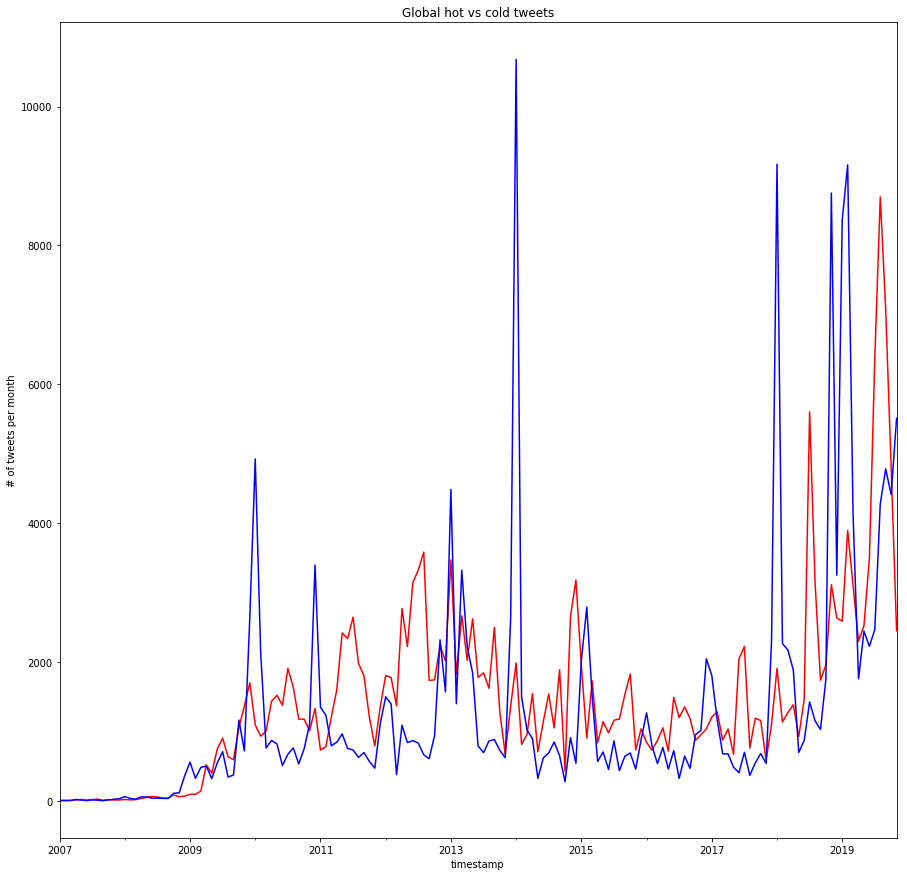

In [13]:
df.timestamp[df.text.str.contains(r"\bhot\b", na=False)].resample("M").count().plot(figsize=(15, 15), title="Global hot vs cold tweets", color="r")
df.timestamp[df.text.str.contains(r"\bcold\b", na=False)].resample("M").count().plot(color="b")
plt.ylabel("# of tweets per month")
plt.show()

In [35]:
%%time
pattern = r"fake|not real|isn'?t real|doesn'?t exist|hoax|propaganda"
deniers = df[df.text.str.contains(pattern, case=False, na=False)]
print(len(deniers))
display_filtered_df(deniers, pattern)

726572


,text_with_emoji_formatted,compound
timestamp,,


CPU times: user 6min 38s, sys: 7.76 s, total: 6min 46s
Wall time: 6min 46s


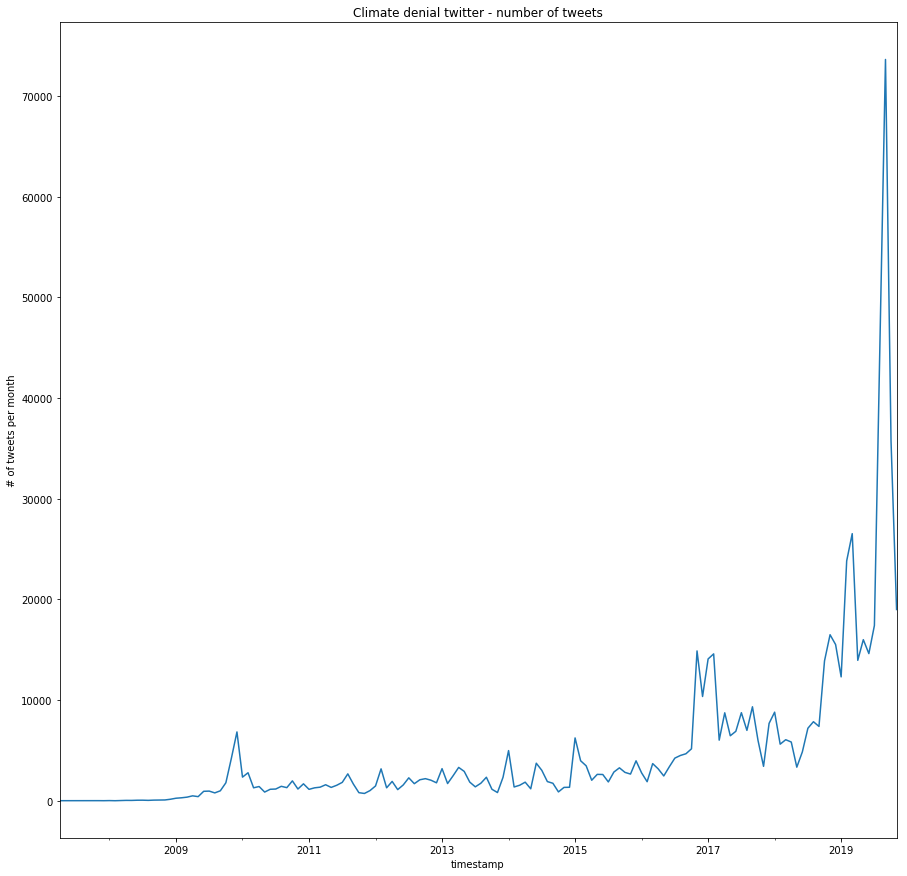

In [36]:
deniers.timestamp.resample("M").count().plot(figsize=(15,15), title="Climate denial twitter - number of tweets")
plt.ylabel("# of tweets per month")
plt.show()

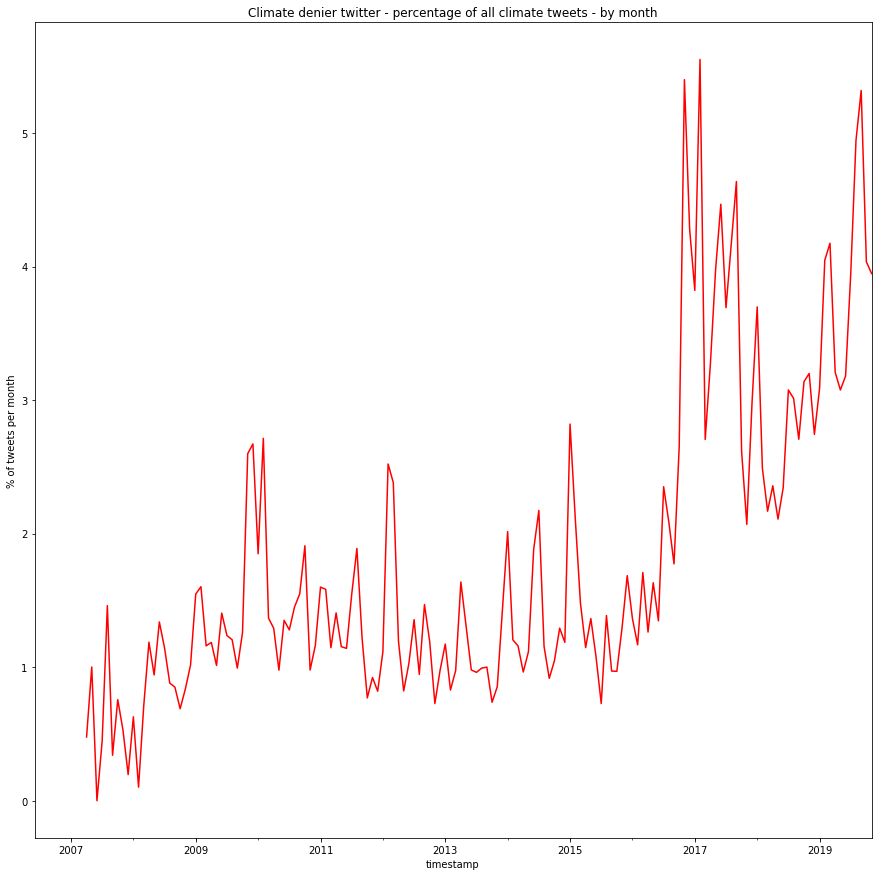

In [33]:
all_tweets_monthly = df.timestamp.resample("M").count()
denier_tweets = deniers.timestamp.resample("M").count()
denier_tweet_pc = denier_tweets / all_tweets_monthly * 100

denier_tweet_pc.plot(figsize=(15,15), title="Climate denier twitter - percentage of all climate tweets - by month",color="r")
plt.ylabel("% of tweets per month")
plt.show()